In [1]:
import os
import pandas as pd
import numpy as np
import glob
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

ImportError: DLL load failed while importing _multiarray_umath: The specified module could not be found.

ImportError: DLL load failed while importing _multiarray_umath: The specified module could not be found.

In [2]:
data_folder = 'dataCSVv10/'
organs = ["adipose_subcutaneous","artery_aorta","artery_coronary","brain_cerebellum","brain_cortex","colon_sigmoid","heart_atrial_appendage","liver","lung","nerve_tibial","pancreas","skin_sun_exposed_lower_leg"]

In [3]:
# Function to load and prepare data for clustering
def load_data_for_organ(organ_name):
    csv_file = glob.glob(os.path.join(data_folder, f'gene_tpm_v10_{organ_name}.csv'))[0]
    df = pd.read_csv(csv_file)
    expression_data = df.iloc[:, 3:].transpose()
    return expression_data

In [4]:
organ_data = {}
for organ in organs:
    organ_data[organ] = load_data_for_organ(organ)

In [5]:
combined_data = pd.concat(organ_data.values())
combined_data.fillna(combined_data.mean(), inplace=True)
combined_data

,0,1,2,3,4,5,6,7,8,9,...,59023,59024,59025,59026,59027,59028,59029,59030,59031,59032
GTEX-111CU-1826-SM-5GZYN,0.000000,3.06160,0.0,0.000000,0.000000,0.000000,0.071885,0.038825,0.049414,0.176161,...,22628.2,0.736558,2.584200,0.715810,3951.56,3687.20,5.89247,19690.6,0.000000,0.747390
GTEX-111FC-0226-SM-5N9B8,0.000000,3.95025,0.0,0.042660,0.000000,0.000000,0.052253,0.000000,0.071839,0.000000,...,27766.4,1.070820,0.626156,0.000000,3412.46,3271.62,3.74786,22023.9,0.000000,2.716410
GTEX-111VG-2326-SM-5N9BK,0.000000,3.19860,0.0,0.000000,0.000000,0.000000,0.028885,0.015601,0.039712,0.082584,...,19068.9,1.183870,0.000000,0.000000,2374.52,2449.22,5.91938,13361.4,0.618844,0.600643
GTEX-111YS-2426-SM-5GZZQ,0.000000,2.98399,0.0,0.000000,0.037800,0.000000,0.000000,0.052802,0.044802,0.053239,...,51970.8,1.335610,0.780989,0.648991,6106.99,5330.43,16.69510,37726.2,0.698157,2.032870
GTEX-1122O-2026-SM-9YFMG,0.000000,2.59251,0.0,0.028196,0.000000,0.087205,0.017268,0.046634,0.023741,0.007053,...,44809.3,0.353875,0.000000,0.000000,6620.23,6276.19,15.92440,34497.1,0.369960,0.359079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GTEX-ZYW4-0126-SM-5E44A,0.000000,2.08963,0.0,0.059341,0.000000,0.061178,0.000000,0.078517,0.000000,0.029688,...,26965.0,2.234320,0.000000,1.447590,8123.10,12099.80,31.28050,15140.7,2.335880,1.511450
GTEX-ZYY3-0126-SM-5GZY5,0.000000,14.85090,0.0,0.000000,0.045574,0.066137,0.078578,0.042441,0.027008,0.032094,...,19930.1,0.000000,1.883210,0.782462,6687.76,12316.60,44.28280,14696.6,3.366960,1.633970
GTEX-ZZ64-1726-SM-5GZYB,0.000000,8.18698,0.0,0.000000,0.000000,0.000000,0.033000,0.017824,0.045369,0.080870,...,27012.4,0.000000,0.000000,0.657215,7921.64,10899.30,35.16580,19689.5,0.000000,2.058630
GTEX-ZZPT-0226-SM-5E43X,0.000000,4.00980,0.0,0.048417,0.034396,0.099831,0.088959,0.112110,0.000000,0.036334,...,36292.6,0.000000,2.842660,1.181110,6470.48,6516.84,17.01480,28450.7,0.000000,1.849820


In [6]:
organ_labels = []
for organ, data in organ_data.items():
    organ_labels.extend([organ] * data.shape[0])

In [7]:
# n_clusters = organs.__len__()
# kmeans = KMeans(n_clusters=n_clusters, random_state=42)
# kmeans.fit(combined_data)
# combined_data['Cluster'] = kmeans.labels_
# combined_data['Cluster']

In [8]:
combined_data['Organ'] = organ_labels
combined_data

,0,1,2,3,4,5,6,7,8,9,...,59024,59025,59026,59027,59028,59029,59030,59031,59032,Organ
GTEX-111CU-1826-SM-5GZYN,0.000000,3.06160,0.0,0.000000,0.000000,0.000000,0.071885,0.038825,0.049414,0.176161,...,0.736558,2.584200,0.715810,3951.56,3687.20,5.89247,19690.6,0.000000,0.747390,adipose_subcutaneous
GTEX-111FC-0226-SM-5N9B8,0.000000,3.95025,0.0,0.042660,0.000000,0.000000,0.052253,0.000000,0.071839,0.000000,...,1.070820,0.626156,0.000000,3412.46,3271.62,3.74786,22023.9,0.000000,2.716410,adipose_subcutaneous
GTEX-111VG-2326-SM-5N9BK,0.000000,3.19860,0.0,0.000000,0.000000,0.000000,0.028885,0.015601,0.039712,0.082584,...,1.183870,0.000000,0.000000,2374.52,2449.22,5.91938,13361.4,0.618844,0.600643,adipose_subcutaneous
GTEX-111YS-2426-SM-5GZZQ,0.000000,2.98399,0.0,0.000000,0.037800,0.000000,0.000000,0.052802,0.044802,0.053239,...,1.335610,0.780989,0.648991,6106.99,5330.43,16.69510,37726.2,0.698157,2.032870,adipose_subcutaneous
GTEX-1122O-2026-SM-9YFMG,0.000000,2.59251,0.0,0.028196,0.000000,0.087205,0.017268,0.046634,0.023741,0.007053,...,0.353875,0.000000,0.000000,6620.23,6276.19,15.92440,34497.1,0.369960,0.359079,adipose_subcutaneous
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GTEX-ZYW4-0126-SM-5E44A,0.000000,2.08963,0.0,0.059341,0.000000,0.061178,0.000000,0.078517,0.000000,0.029688,...,2.234320,0.000000,1.447590,8123.10,12099.80,31.28050,15140.7,2.335880,1.511450,skin_sun_exposed_lower_leg
GTEX-ZYY3-0126-SM-5GZY5,0.000000,14.85090,0.0,0.000000,0.045574,0.066137,0.078578,0.042441,0.027008,0.032094,...,0.000000,1.883210,0.782462,6687.76,12316.60,44.28280,14696.6,3.366960,1.633970,skin_sun_exposed_lower_leg
GTEX-ZZ64-1726-SM-5GZYB,0.000000,8.18698,0.0,0.000000,0.000000,0.000000,0.033000,0.017824,0.045369,0.080870,...,0.000000,0.000000,0.657215,7921.64,10899.30,35.16580,19689.5,0.000000,2.058630,skin_sun_exposed_lower_leg
GTEX-ZZPT-0226-SM-5E43X,0.000000,4.00980,0.0,0.048417,0.034396,0.099831,0.088959,0.112110,0.000000,0.036334,...,0.000000,2.842660,1.181110,6470.48,6516.84,17.01480,28450.7,0.000000,1.849820,skin_sun_exposed_lower_leg


In [9]:
tsne = TSNE(n_components=2)
reduced_data = tsne.fit_transform(combined_data.drop(columns=['Organ']))
reduced_data

array([[ 25.60803  ,  -5.7350736],
       [ 17.535265 ,  -6.7914386],
       [ 28.891796 , -13.175738 ],
       ...,
       [-45.194084 , -31.065477 ],
       [ 29.458689 ,   9.640804 ],
       [-40.153896 , -22.295244 ]], dtype=float32)

In [10]:
reduced_df = pd.DataFrame(data=reduced_data, columns=['Dim1', 'Dim2'])
# reduced_df['Cluster'] = combined_data['Cluster'].values
reduced_df['Organ'] = combined_data['Organ'].values
reduced_df

,Dim1,Dim2,Organ
0,25.608030,-5.735074,adipose_subcutaneous
1,17.535265,-6.791439,adipose_subcutaneous
2,28.891796,-13.175738,adipose_subcutaneous
3,6.435175,20.196329,adipose_subcutaneous
4,6.841358,18.806236,adipose_subcutaneous
...,...,...,...
5505,-35.200275,-41.947468,skin_sun_exposed_lower_leg
5506,-36.522820,-41.739594,skin_sun_exposed_lower_leg
5507,-45.194084,-31.065477,skin_sun_exposed_lower_leg
5508,29.458689,9.640804,skin_sun_exposed_lower_leg


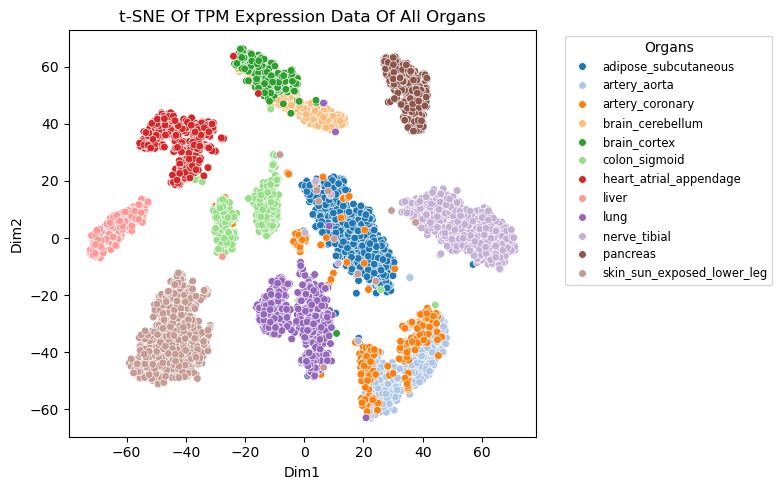

In [20]:
plt.figure(figsize=(8, 5))

# First plot by Cluster
# plt.subplot(1, 2, 1)
# sns.scatterplot(x='Dim1', y='Dim2', hue='Cluster', palette= 'tab20', data=reduced_df, s=100, alpha=0.7)
# plt.title('t-SNE of Gene Expression Data with K-means Clustering')
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Second plot by Organ
# plt.subplot(1, 2, 2)
sns.scatterplot(x='Dim1', y='Dim2', hue='Organ', palette='tab20', data=reduced_df, s=30, alpha=1)
plt.title('t-SNE Of TPM Expression Data Of All Organs')
plt.legend(title="Organs",bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')

plt.tight_layout()
plt.savefig(f'all_organ_clustering.png')
plt.show()
plt.close()